# Drawing molecules

In [29]:
from rdkit import Chem
import pathlib

In [30]:
#Beispielmoleküle
#conda create --name myrdkit rdkit ipython
ethen = "C=C"
benzol = "c1ccccc1"

scharf = "CC(C)/C=C/CCCCC(=O)NCC1=CC(=C(C=C1)O)OC"
morgen = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C" #CN1C=NC2=C1C(=O)N(C(=O)N2C)C 
chill = "CCCCCC1=CC(=C2C3C=C(CCC3C(OC2=C1)(C)C)C)O"

In rdkit werden moleküle als sogenannte Chem objekte behandelt. Diese können aus smiles strings erzeugt werden:

In [31]:
m = Chem.MolFromSmiles(morgen)

zum zeichnen importieren wir noch etwas:

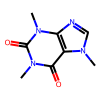

In [32]:
from rdkit.Chem import Draw
from IPython.display import display

img = Draw.MolToImage(m,size=(100, 100))
display(img)

# Aufgabe 1:

Zeichnen Sie alle Beispielmoleküle ... nicht als Spaghetti code sondern über eine liste und eine for Schleife?!

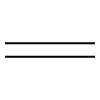

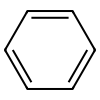

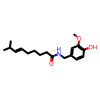

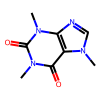

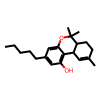

In [33]:
#your code goes here
myMols = [ethen,benzol,scharf,morgen,chill]
for myMol in myMols:
    m = Chem.MolFromSmiles(myMol)
    img = Draw.MolToImage(m,size=(100, 100))
    display(img)

manchmal muss man moleküle beim zeichnen aneinander ausrichten ... das geht so:

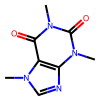

In [34]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import display

# SMILES strings
smiles_template = 'N-C'  # Subgroup from whatever molecule

# Create molecule and template objects
mol = Chem.MolFromSmiles(morgen)
template = Chem.MolFromSmiles(smiles_template)

# Generate 2D coordinates for the template
AllChem.Compute2DCoords(template)

# Align THC to the template
AllChem.GenerateDepictionMatching2DStructure(mol, template)

# Draw the molecule
img = Draw.MolToImage(mol, size=(100, 100))
display(img)

# Obtaining and reading data

You can have a look at https://zinc15.docking.org/genes/DRD2/substances/ where there are over 250.000.000 Substances for virtual screening!

We will now download a large dataset of 250.000 molecules with some additional data:

In [35]:
import requests

def download_file(url, download_path):
    response = requests.get(url)
    if response.status_code == 200:
        #we discuss what this line does:
        file_path = f"{download_path}/250k_rndm_zinc_drugs_clean_3.csv"
        file = open(file_path, "wb")
        file.write(response.content)
        file.close()
        print(f"File downloaded successfully: {file_path}")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")

# Provide the URL and the download path
url = "https://raw.githubusercontent.com/aspuru-guzik-group/chemical_vae/master/models/zinc_properties/250k_rndm_zinc_drugs_clean_3.csv"
download_path = "/home/mmr/how-to-python/chem_python"  # Replace with your desired folder path

download_file(url, download_path)

File downloaded successfully: /home/mmr/how-to-python/chem_python/250k_rndm_zinc_drugs_clean_3.csv


# Two ways of reading in large files!

In [36]:
#using open and readline
# scoping with open(file_path, 'r', encoding='utf-8') as file:
# readline() vs. readlines()
file_path = "/home/mmr/how-to-python/chem_python/250k_rndm_zinc_drugs_clean_3.csv"
file = open(file_path, 'r', encoding='utf-8')


In [37]:
header = file.readline()
smiles, logP, dls = [],[],[]
for i in range(1000):
    smile = file.readline()[1:]
    daten = [float(f) for f in file.readline()[2:].strip("\n").split(",")]
    smiles.append(smile)
    logP.append(daten[0])
    dls.append(daten[1])

In [38]:
#using pandas ... might need to pip install it
import pandas as pd
df = pd.read_csv(file_path, delimiter=",")


1.	logP:

	•	The logarithm of the partition coefficient (P) of a compound between octanol and water.

	•	Used as a measure of a molecule’s hydrophobicity.

	•	Higher logP indicates greater hydrophobicity, while lower (or negative) values indicate hydrophilicity.

	•	Plays a critical role in drug-likeness as it affects solubility and membrane permeability.
	
2.	qed (Quantitative Estimate of Drug-likeness):

	•	A score representing how “drug-like” a compound is based on several molecular properties (e.g., molecular weight, number of hydrogen bond donors/acceptors, and logP).

	•	The score ranges between 0 (not drug-like) and 1 (highly drug-like).

	•	A high QED value suggests that a molecule is likely to have favorable pharmacological properties.
	
3.	SAS (Synthetic Accessibility Score):

	•	A heuristic score estimating how easy it would be to synthesize the molecule in a lab.

	•	Lower values indicate higher synthetic accessibility (easier to make).

	•	Factors influencing SAS include molecule size, complexity, and the presence of unusual or challenging substructures.
	

# Statistics

Now we want to plot some statistics and simple correlations!


In [39]:
import numpy as np
logP = np.array(logP)
dls = np.array(dls)

In [40]:
np.mean(logP)

np.float64(2.5447528700000004)

In [41]:
np.median(logP)

np.float64(2.68833)

In [42]:
np.percentile(logP,5)

np.float64(-0.14993699999999988)

In [43]:
np.percentile(logP,95)

np.float64(4.62554)

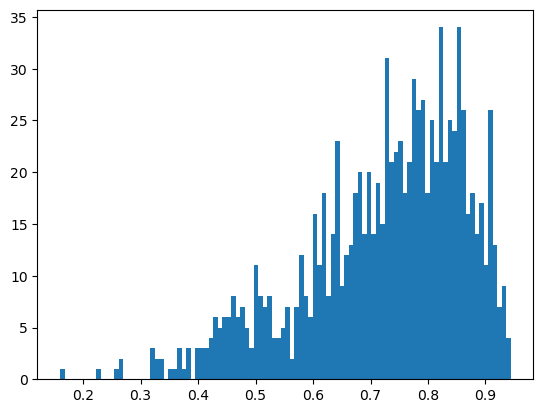

In [44]:
import matplotlib.pyplot as plt
_ = plt.hist(dls,100)

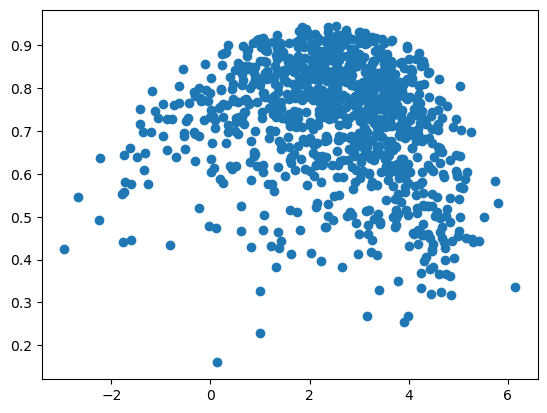

In [45]:
plt.scatter(logP,dls)

# Etwas mehr plotting!

Wir schuen uns zunächst etwas code an!

In [46]:
a = [343, 45]
a*3

[343, 45, 343, 45, 343, 45]

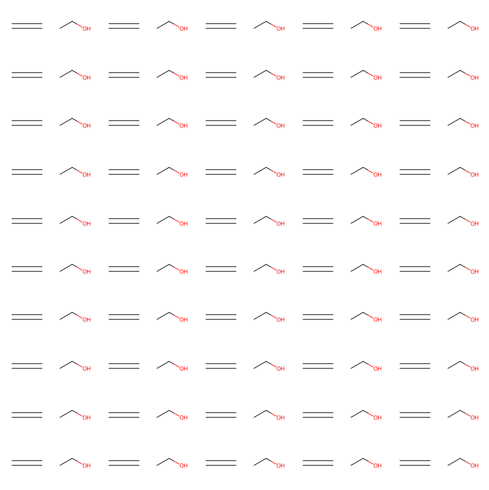

In [47]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

myMols = ['C=C','CCO']
molecules = [Chem.MolFromSmiles(smile) for smile in myMols]

molecules *= 50

# Create the subplots
fig, axes = plt.subplots(10, 10, figsize=(5, 5))
for idx, ax in enumerate(axes.flatten()):
    img = Draw.MolToImage(molecules[idx], size=(100, 100))
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

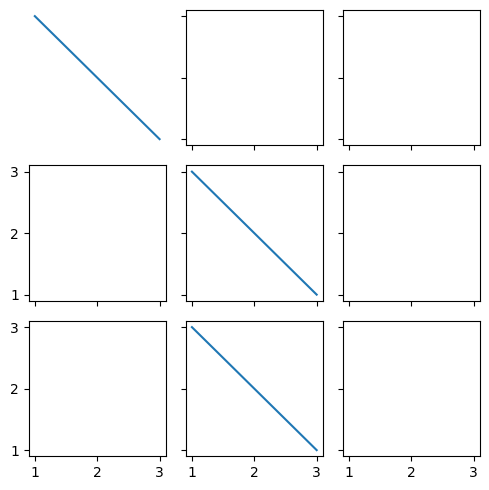

In [48]:
fig, axes = plt.subplots(3, 3, figsize=(5, 5), sharex=True, sharey=True)
axes[0,0].plot([1,2,3],[3,2,1])
axes[1,1].plot([1,2,3],[3,2,1])
axes[2,1].plot([1,2,3],[3,2,1])
axes[0,0].axis('off')

plt.tight_layout()
plt.show

# Aufgabe:

Erstellen Sie ein grid auf 3x3 subplots in denen jeweils Methanol, Ethanol, Buthanol, Pentanol etc...
"CO", "CCO", "CCCO", "CCCCO", "CCCCCO" ...

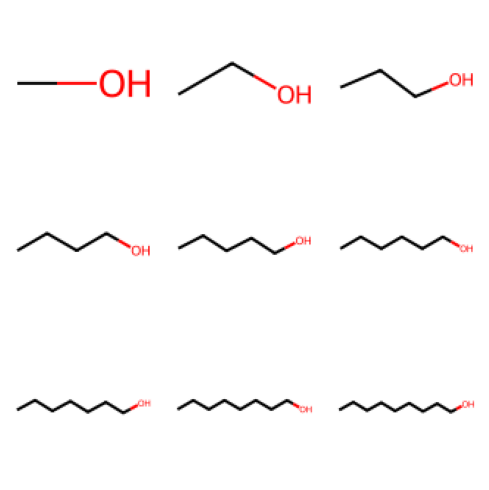

In [49]:
alkohole = ["CO", "CCO", "CCCO", "CCCCO", "CCCCCO", "CCCCCCO", "CCCCCCCO", "CCCCCCCCO", "CCCCCCCCCO"]
molecules = [Chem.MolFromSmiles(smile) for smile in alkohole]

fig, axes = plt.subplots(3, 3, figsize=(5, 5))
for idx, ax in enumerate(axes.flatten()):
    img = Draw.MolToImage(molecules[idx], size=(100, 100))
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()

# Aufgabe:

Zeichnen sie die top 100 moleküle die den höchsten Synthetisierbarkeitsscore haben und jene 100 mit dem niedrigsten.
Schauen Sie in der Dokumentation von matplotlib wie sie die Abbildung als ein SVG abspeichern können!

Fehler beim Parsen von SMILES: smiles


[11:33:51] SMILES Parse Error: syntax error while parsing: smiles
[11:33:51] SMILES Parse Error: check for mistakes around position 2:
[11:33:51] smiles
[11:33:51] ~^
[11:33:51] SMILES Parse Error: Failed parsing SMILES 'smiles' for input: 'smiles'


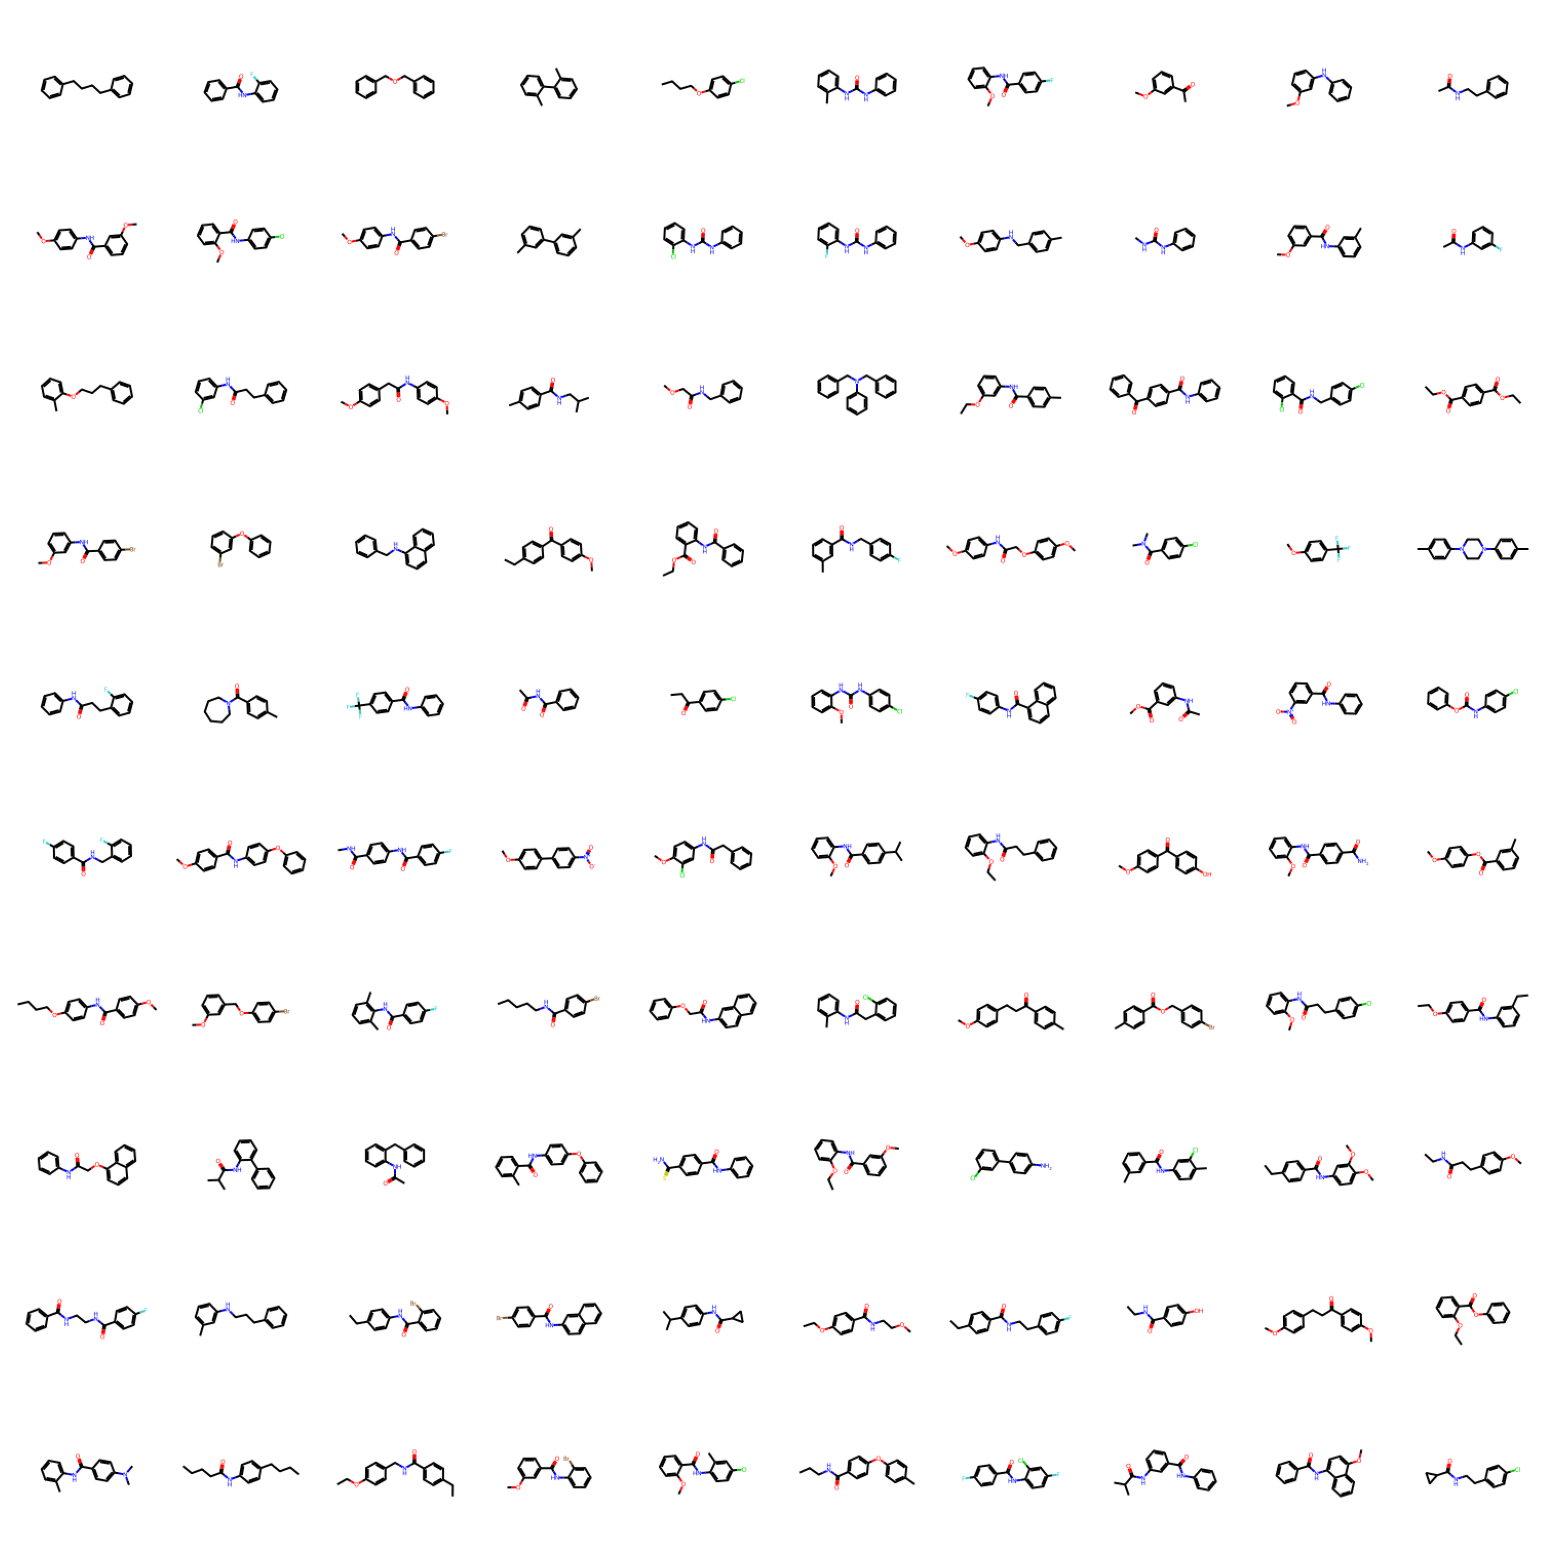

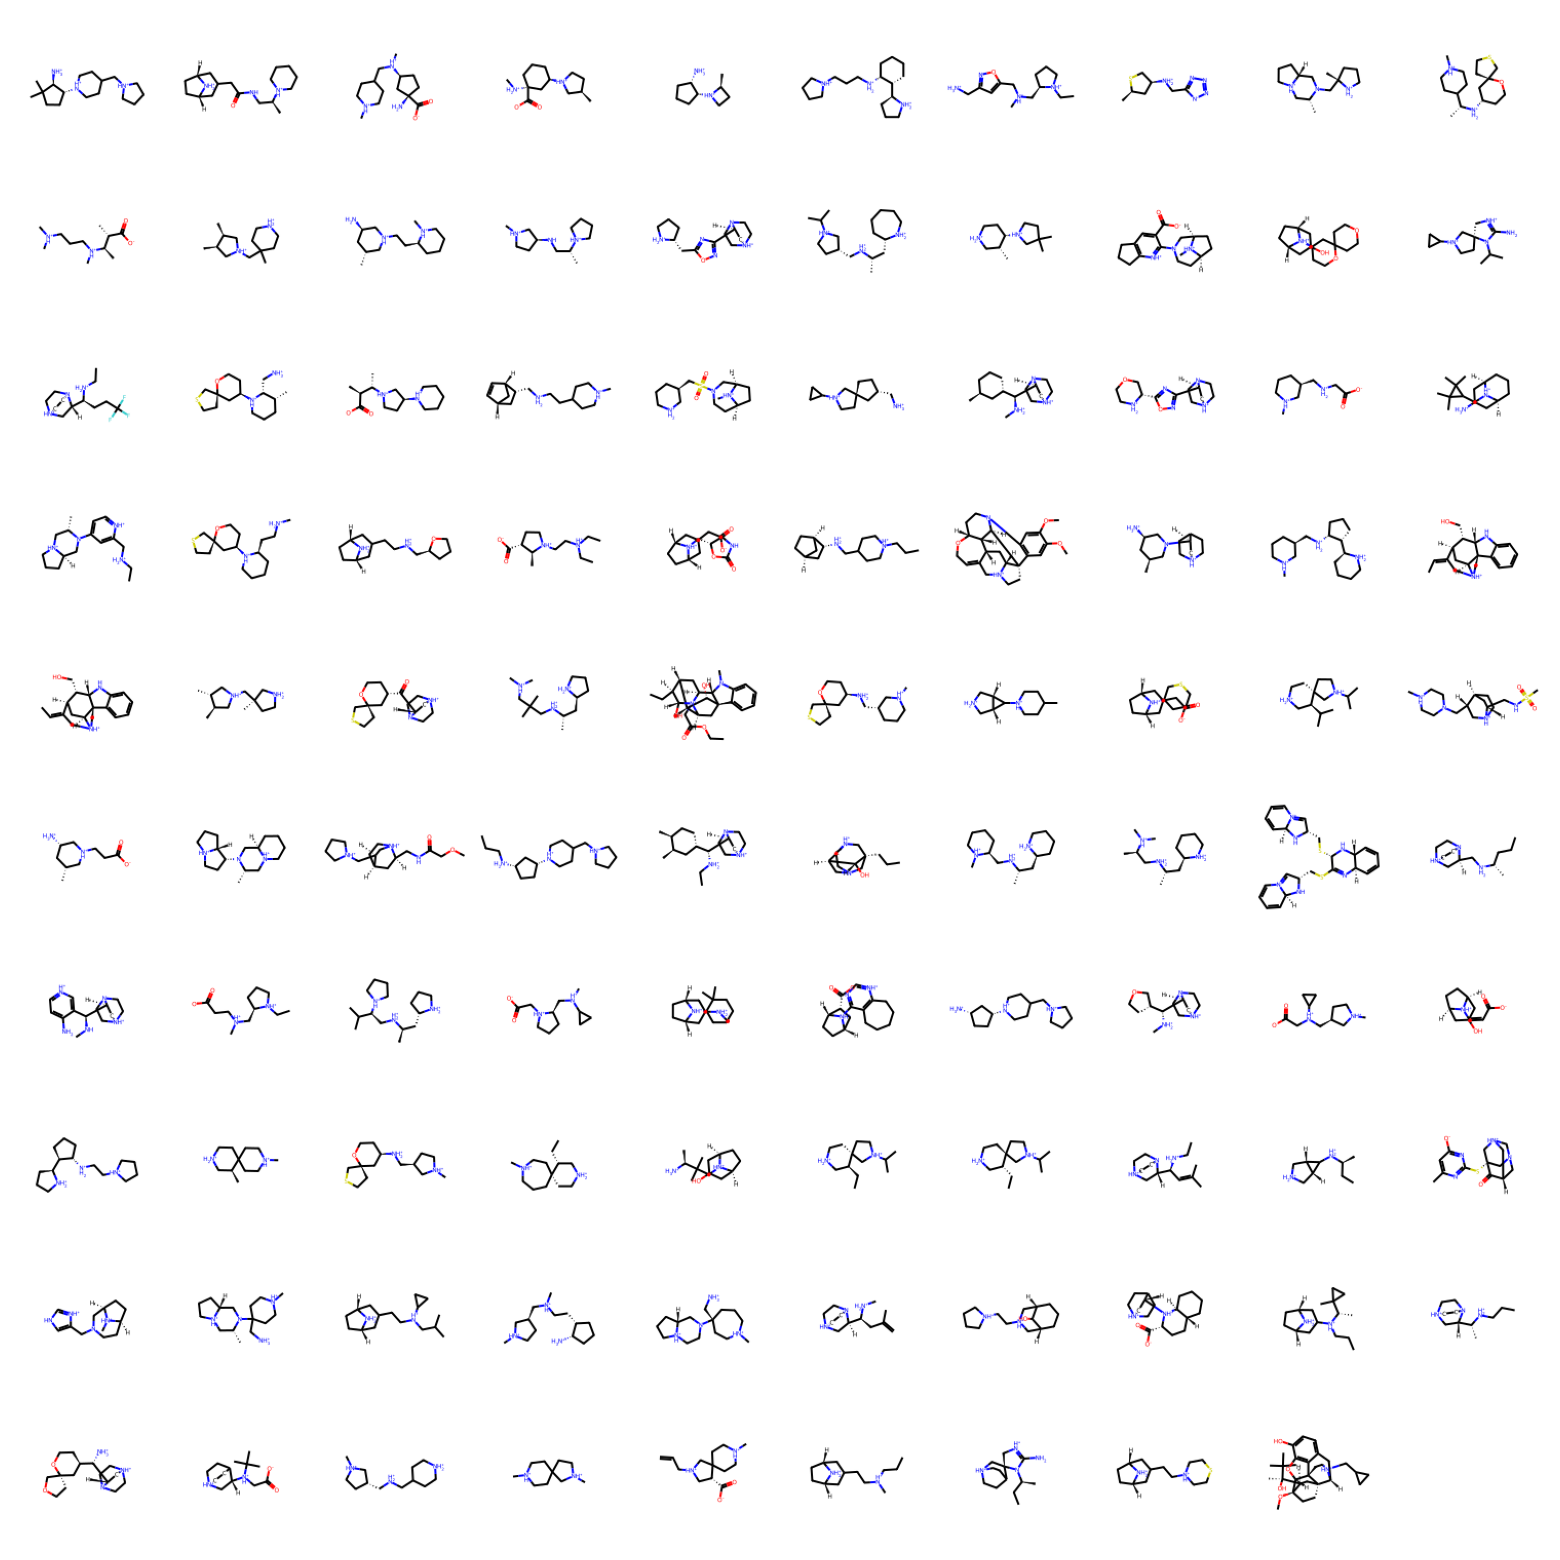

In [59]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import csv 

df = pd.read_csv('250k_rndm_zinc_drugs_clean_3.csv', header=None, engine='python', quoting=csv.QUOTE_ALL)

df_sorted = df.sort_values(by=df.columns[-1])

bottom100 = df_sorted.head(100)
top100 = df_sorted.tail(100)

def clean_smiles(smiles):
    return smiles.strip('"').replace('\n', '')

def smi_to_mol(smi):
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        print(f"Fehler beim Parsen von SMILES: {smi}")
    return mol

smiles_col = df.columns[0]

bottom_smiles = bottom100[smiles_col].apply(clean_smiles).tolist()
bottom_mols = [smi_to_mol(smi) for smi in bottom_smiles]
bottom_mols = [mol for mol in bottom_mols if mol is not None]  

top_smiles = top100[smiles_col].apply(clean_smiles).tolist()
top_mols = [smi_to_mol(smi) for smi in top_smiles]
top_mols = [mol for mol in top_mols if mol is not None] 

img_bottom = Draw.MolsToGridImage(bottom_mols, molsPerRow=10, subImgSize=(150,150))
img_top = Draw.MolsToGridImage(top_mols, molsPerRow=10, subImgSize=(150,150))

fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(img_bottom)
ax.axis('off')
plt.savefig('bottom_molecules.svg', format='svg')

fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(img_top)
ax.axis('off')
plt.savefig('top_molecules.svg', format='svg')

# Aufgabe:

Alle moleküle haben Namen ... diese lassen sich auch automatisch generieren. Nur wie? 

# R2 score (and its issues)

The formula for the R² score is:

$R2 = 1 - \frac{\sum((y_i - y^{hat}_i)^2}{\sum(y_i - y^{mean})^2}$

where:
- yᵢ are the observed values,
- ŷᵢ are the predicted values,
- ȳ is the mean of the observed values.

# Tasks

Draw the most/least synthesizeable molecule

Draw the most/least hydrophobic molecule

then 


Draw the 100 most/least synthesizeable molecule

Draw the 100 most/least hydrophobic molecule